# Word2vec word embeddings

## dataset
Sử dụng Zachary's karate club là data thể hiện mối quan hệ của các thành viên trong 1 câu lạc bộ
Data có sẵn trong thư viện networkx

In [13]:
import networkx as nx

G = nx.karate_club_graph()
print(G.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


c:\users\dell\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


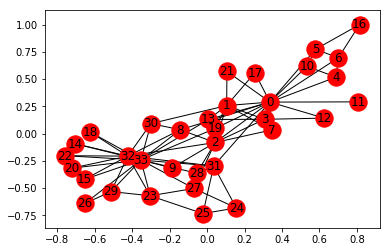

In [14]:
import matplotlib.pyplot as plt
nx.draw_networkx(G)
plt.show()

## node ebeddings

In [15]:
from node2vec import Node2Vec

node2vec = Node2Vec(G,dimensions=10,walk_length=5,num_walks=100)

model = node2vec.fit(window= 10)

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 187.24it/s]


In [16]:
print(model.most_similar('0'))
print(" ")
print(model.wv['0'])

c:\users\dell\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
c:\users\dell\python36\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('21', 0.9977864027023315), ('10', 0.9957300424575806), ('4', 0.9939180016517639), ('17', 0.9905712008476257), ('3', 0.9902203679084778), ('7', 0.9899673461914062), ('1', 0.9895950555801392), ('12', 0.9893206357955933), ('11', 0.98732990026474), ('6', 0.9869478940963745)]
 
[-0.26612553 -0.05656453 -0.68759793  0.27555883 -0.16732974  0.8795705
 -0.13998029 -0.03835568 -0.12506258  0.835024  ]


## Giảm số chiều bằng PCA để visualize

In [17]:
print(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [18]:
data_vec = []
for i in range(34):
    data_vec.append(model.wv[str(i)])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_vec)
print(pca.explained_variance_ratio_) # thông tin còn giữ lại được

[0.59995495 0.15591249]


### Visualize
ta thấy rằng các điểm có mối quan hệ trực tiếp trên graph khi biểu diễn lên không gian 2 chiều sẽ có vị trí ở gần nhau

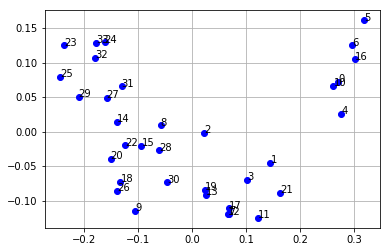

In [19]:
import numpy as np
X = np.array(pca.transform(data_vec))
plt.plot(X[:,0],X[:,1],'bo')
for i in range(len(X)):
    plt.text(X[i][0],X[i][1],str(i))
plt.grid()
plt.show()

## Sử dụng thuật toán Phân cụm cho data sau khi embed
K-means Clustering với K=2

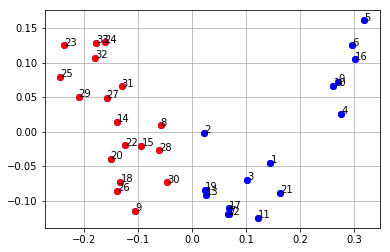

In [23]:
from sklearn.cluster import KMeans

def visualizeKmean(K,data):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(data)
    label = kmeans.predict(data_vec)
    #visualize
    plt.plot(X[:,0],X[:,1],'bo')
    for i in range(len(X)):
        if (label[i]==1):
            plt.plot(X[i][0],X[i][1],'bo')
        elif (label[i]==0):
            plt.plot(X[i][0],X[i][1],'ro')
        else:
            plt.plot(X[i][0],X[i][1],'go')
    for i in range(len(X)):
        plt.text(X[i][0],X[i][1],str(i))
    plt.grid()
    plt.show()

visualizeKmean(2,data_vec)

K-means Clustering với K=3

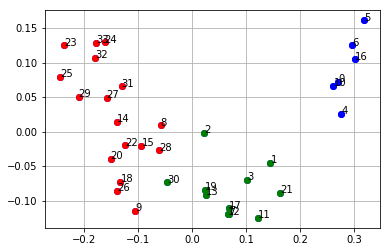

In [24]:
visualizeKmean(3,data_vec)